In [1]:

import pandas as pd

# Load the dataset
file_path =("C:\\Users\\sathe\\OneDrive\\Desktop\\MAJOR PROJECT\\global-data-on-sustainable-energy (1).csv")
data= pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head(3))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fo

In [2]:
data.shape

(3649, 21)

In [3]:
# Check for missing values in all columns
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_

In [4]:
data['Access to electricity (% of population)'] = data['Access to electricity (% of population)'].interpolate(method='linear')
data['Electricity from fossil fuels (TWh)'] = data['Electricity from fossil fuels (TWh)'].interpolate(method='linear')
data['Low-carbon electricity (% electricity)'] = data['Low-carbon electricity (% electricity)'].interpolate(method='linear')


In [5]:
data['gdp_per_capita'] = data['gdp_per_capita'].fillna(data['gdp_per_capita'].median())
data['gdp_growth'] = data['gdp_growth'].fillna(data['gdp_growth'].mean())

In [6]:
# Check for missing values in all columns
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                                0
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                    0
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                 0
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
# Assuming `data` is your DataFrame
# Apply log transformation to the target variable to reduce the impact of peaks
data['log_energy_consumption'] = np.log1p(data['Primary energy consumption per capita (kWh/person)'])

# Define features and target
features = ['Access to electricity (% of population)', 'gdp_per_capita','Electricity from fossil fuels (TWh)']
target = 'log_energy_consumption'

X = data[features].values
y = data[target].values

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data to fit LSTM input
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
from tensorflow.keras.layers import Input

# Build LSTM model with the Input layer
model = Sequential([
    Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),  # Using Input layer for specifying input shape
    LSTM(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))





Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 83.3833 - mae: 8.9598 - val_loss: 56.3098 - val_mae: 7.2438
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.7810 - mae: 5.6173 - val_loss: 5.1954 - val_mae: 1.5335
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8343 - mae: 1.3437 - val_loss: 3.2982 - val_mae: 1.2550
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8703 - mae: 1.1745 - val_loss: 2.4403 - val_mae: 1.0480
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1108 - mae: 0.9698 - val_loss: 1.8239 - val_mae: 0.9102
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4937 - mae: 0.8248 - val_loss: 1.4825 - val_mae: 0.7869
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2493 - mae: 0.7163 - val_loss: 1.2487 - val_mae: 0.6986
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4167 - mae: 0.6840 - val_loss: 1.1297 - val_mae: 0.6518
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1892 - ma

In [12]:
# Predict using the trained model
train_predict = model.predict(X_train_scaled)
test_predict = model.predict(X_test_scaled)


92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [13]:
# Inverse the log transformation for train and test predictions
train_predict_rescaled = np.expm1(train_predict)  # Inverse of log1p
test_predict_rescaled = np.expm1(test_predict)    # Inverse of log1p

# Inverse scaling for actual target values
y_train_actual = np.expm1(y_train)  # Inverse of log1p
y_test_actual = np.expm1(y_test)    # Inverse of log1p


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Calculate MAE and RMSE for train and test predictions
train_mae = mean_absolute_error(y_train_actual, train_predict_rescaled)
test_mae = mean_absolute_error(y_test_actual, test_predict_rescaled)

train_rmse = math.sqrt(mean_squared_error(y_train_actual, train_predict_rescaled))
test_rmse = math.sqrt(mean_squared_error(y_test_actual, test_predict_rescaled))

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


Train MAE: 12708.342762457703
Test MAE: 13993.528297353614
Train RMSE: 23506.17352815986
Test RMSE: 24648.25347371147


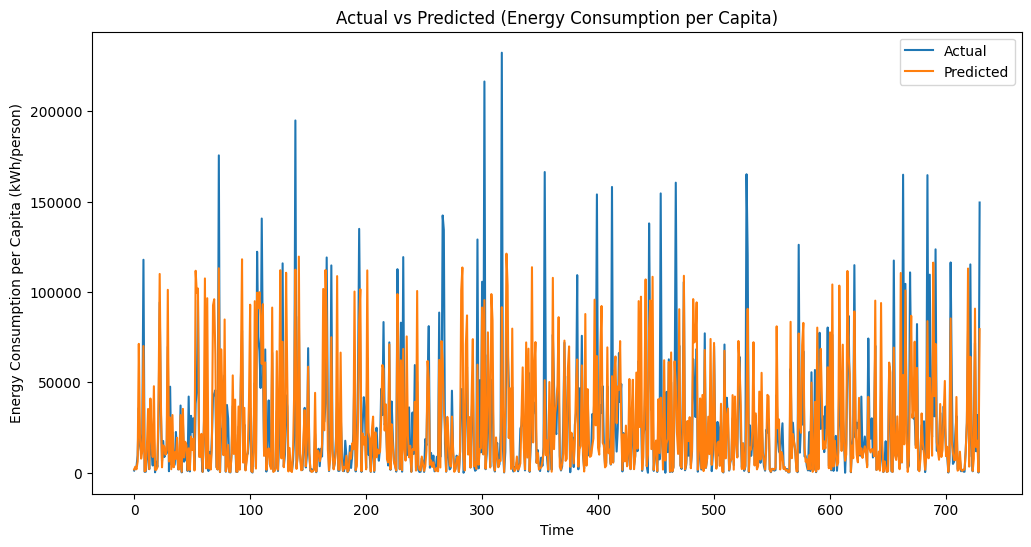

In [15]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(test_predict_rescaled, label='Predicted')
plt.title('Actual vs Predicted (Energy Consumption per Capita)')
plt.xlabel('Time')
plt.ylabel('Energy Consumption per Capita (kWh/person)')
plt.legend()
plt.show()
